1. Image segmentation is a process to highlight useful regions in images. Use the
skimage.io module to load the following image. Afterwards, segment the image into
multiple useful regions using the k-means clustering method. The segmented image
should highlight, for example, the dashboard, the driver’s arms, cars ahead etc., by
grouping similar pixels together. You do not need to split the data into train and test set
for this problem.

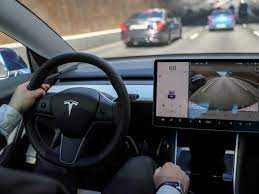




In [ ]:
import skimage.io as io
import numpy as np
from sklearn.cluster import KMeans

image = io.imread('seg2.jpg')
print(image)
print(image.shape) # shows it is color image - a 194 x 259 pixel image with 3 channels (RGB)

[[[112 123 129]
  [113 124 130]
  [115 126 132]
  ...
  [175 170 164]
  [175 170 164]
  [175 170 164]]

 [[111 122 128]
  [112 123 129]
  [114 125 131]
  ...
  [166 163 156]
  [166 163 156]
  [167 162 158]]

 [[110 121 127]
  [111 122 128]
  [113 124 130]
  ...
  [155 152 147]
  [153 152 147]
  [155 151 148]]

 ...

 [[ 10  11  13]
  [ 10  11  13]
  [ 11  12  14]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  8   9  13]
  [  8   9  13]
  [  9  10  14]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  8   9  13]
  [  8   9  13]
  [  9  10  14]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]
(194, 259, 3)


In [ ]:
pixels = image.reshape((-1, 3)) # reshape to (num_pixels, num_channels)
print(pixels)

[[112 123 129]
 [113 124 130]
 [115 126 132]
 ...
 [  1   1   1]
 [  1   1   1]
 [  1   1   1]]


In [ ]:
kmeans = KMeans(n_clusters = 4) # set n_clusters = 4 for 4 clusters: window, wheel, arms, dashboard
kmeans.fit(pixels)
labels = kmeans.labels_
segmented_image = labels.reshape(image.shape[:2])

<ipython-input-5-1e07eeb232a2>:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(segmented_image)
/usr/local/lib/python3.11/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
<ipython-input-5-1e07eeb232a2>:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


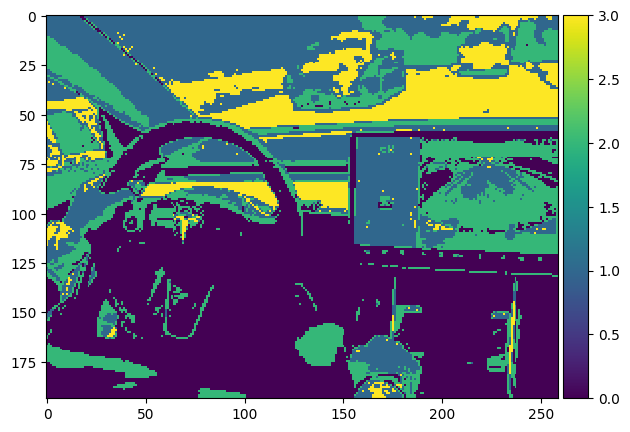

In [ ]:
io.imshow(segmented_image)
io.show()

2. Implement your own linear machine learning model optimized with minibatch gradient descent method to predict the price of a house in a city with population
of 160, 000. Train the model to fit the housing prices dataset found on LMS. Vary the
batch size from 1,5,10, and 20. Plot the objective function, J for each batch size. You do
not need to split the data into train and test set for this problem. What happens when
you use batch size equal to one?


Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


Text(0, 0.5, 'Price in $10,000s')

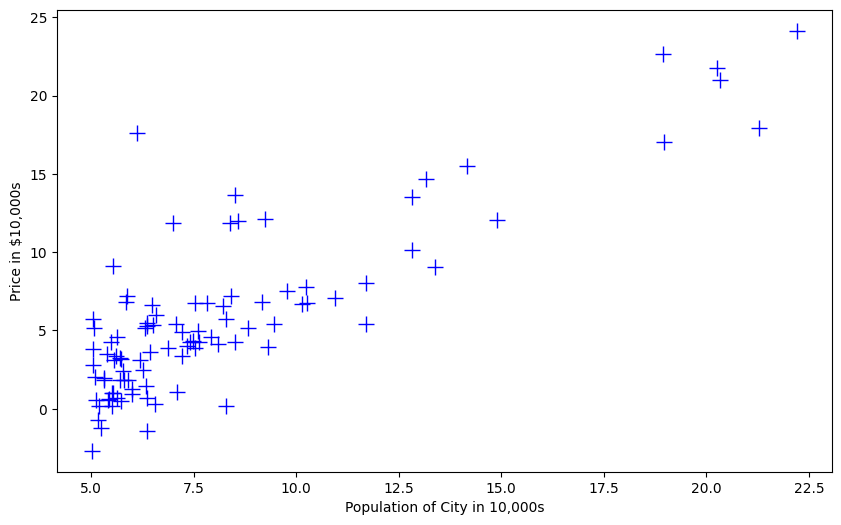

In [ ]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab Notebooks/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'b+',markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

In [ ]:
print(X.shape)
print(y.shape)

(97, 2)
(97, 1)


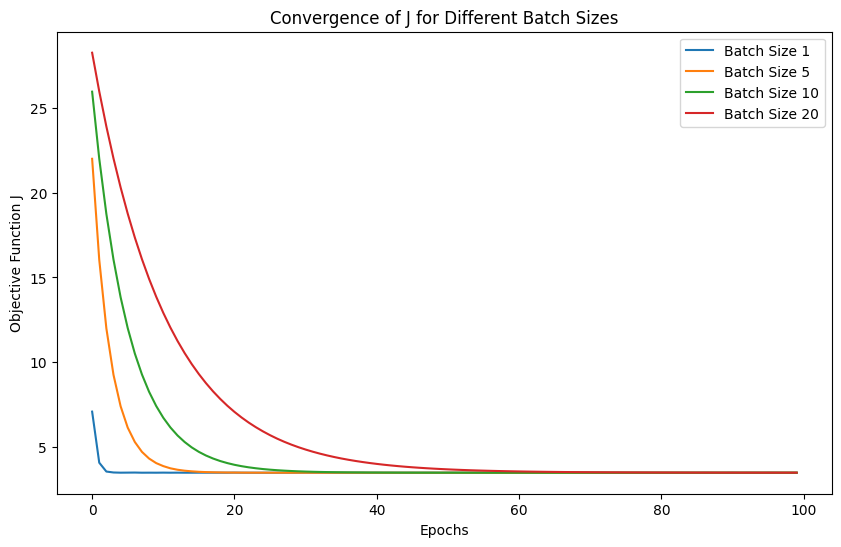

Predicted price for population 160,000: 15.21 in 10,000s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (assuming it's in CSV format)
data = np.loadtxt('housing_prices.txt', delimiter=',', skiprows=1)  # Modify filename if needed
X = data[:, 0].reshape(-1, 1)  # Population (feature)
y = data[:, 1].reshape(-1, 1)  # Price (target)

# Normalize the features
X = (X - np.mean(X)) / np.std(X)

# Initialize parameters
m, n = X.shape
theta = np.zeros((n + 1, 1))  # Include bias term
X_bias = np.hstack([np.ones((m, 1)), X])  # Add bias term

# Define hyperparameters
learning_rate = 0.01
epochs = 100
batch_sizes = [1, 5, 10, 20]

# Minibatch Gradient Descent function
def minibatch_gradient_descent(X, y, theta, learning_rate, epochs, batch_size):
    m = len(y)
    J_history = []

    for epoch in range(epochs):
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            gradient = (1 / batch_size) * X_batch.T @ (X_batch @ theta - y_batch)
            theta -= learning_rate * gradient

        J = (1 / (2 * m)) * np.sum((X @ theta - y) ** 2)
        J_history.append(J)

    return theta, J_history

# Train model for different batch sizes and plot J
theta_dict = {}
J_histories = {}
plt.figure(figsize=(10, 6))

for batch_size in batch_sizes:
    theta_opt, J_history = minibatch_gradient_descent(X_bias, y, np.zeros((n + 1, 1)), learning_rate, epochs, batch_size)
    theta_dict[batch_size] = theta_opt
    J_histories[batch_size] = J_history
    plt.plot(J_history, label=f'Batch Size {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Objective Function J')
plt.title('Convergence of J for Different Batch Sizes')
plt.legend()
plt.show()

# Predict price for a city with population 160,000
population = (16 - np.mean(data[:, 0])) / np.std(data[:, 0])  # Normalize input
population_bias = np.array([[1, population]])
predicted_price = population_bias @ theta_dict[10]  # Using batch size 10 as reference
print(f"Predicted price for population 160,000: {predicted_price[0][0]:.2f} in 10,000s")


Using a Batch size of 1 causes J to converge immediately at nearly, if not, the first epoch.

3. Use the Scikit-learn breast cancer Wisconsin dataset and a logistic regression
model to classify breast cancers. You must recursively eliminate features to find the best
two features to perform the classification. Evaluate the model using various classification
metrics and report your findings. Use a 70%-30% split.

In [30]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
# loading the data and splitting the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.3, stratify=cancer.target, random_state=42)
print('original features and their names: ', cancer.feature_names)
print('number of features:', cancer.feature_names.size)
print(X_train)
print(y_train)

original features and their names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
number of features: 30
[[1.162e+01 1.818e+01 7.638e+01 ... 1.416e-01 2.660e-01 9.270e-02]
 [1.120e+01 2.937e+01 7.067e+01 ... 0.000e+00 1.566e-01 5.905e-02]
 [1.057e+01 1.832e+01 6.682e+01 ... 2.222e-02 2.699e-01 6.736e-02]
 ...
 [1.365e+01 1.316e+01 8.788e+01 ... 8.056e-02 2.380e-01 8.718e-02]
 [1.705e+01 1.908e+01 1.134e+02 ... 2.543e-01 3.109e-01 9.061e-02]
 [9.904e+00 1.806e+01 6.460e+01 ... 9.910e-02 

In [31]:
# fitting the linear regression model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
log_reg = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg.fit(X_train, y_train)
print('training accuracy:', log_reg.score(X_train, y_train))
print('test accuracy:', log_reg.score(X_test, y_test))

# adding the recursive feature elimination following the lecture notes
recursive_feature_elim = RFE(log_reg, n_features_to_select=2) # select only the two best features
recursive_feature_elim.fit(X_train, y_train)
print('True/False Selection of features:', recursive_feature_elim.support_) #recursive_feature_elim.support_ is a boolean array showing which two features were picked
feature_indices = np.array(np.linspace(0, 30, 30))
feature_indices = feature_indices[recursive_feature_elim.support_] # filters feature_indices such that only the true features stay, aka the best ones
print('the best features are: ', np.array(cancer.feature_names)[recursive_feature_elim.support_])

training accuracy: 0.9698492462311558
test accuracy: 0.9473684210526315
True/False Selection of features: [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False  True  True False False False]
the best features are:  ['worst compactness' 'worst concavity']


Text(0, 0.5, 'worst concavity')

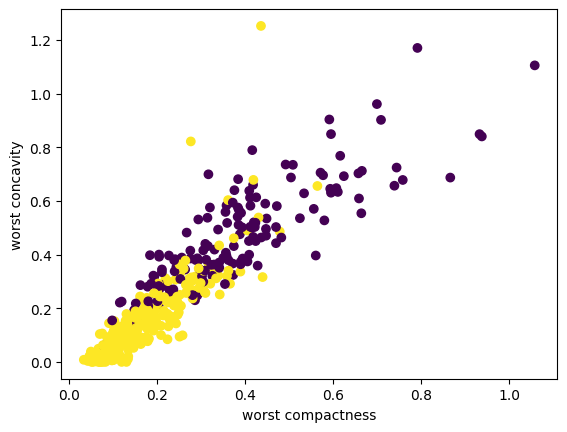

In [32]:
import matplotlib.pyplot as plt
feature_indices = feature_indices.astype(int) # Convert feature_indices to integers
plt.scatter(X_train[:,feature_indices[0]], X_train[:,feature_indices[1]], c =y_train)
plt.xlabel(cancer.feature_names[feature_indices[0]])
plt.ylabel(cancer.feature_names[feature_indices[1]])

In [33]:
# visualizing best features
print(X_train[:,feature_indices])

[[0.2878   0.3186  ]
 [0.05494  0.      ]
 [0.06542  0.03986 ]
 [0.1839   0.1255  ]
 [0.1507   0.1275  ]
 [0.0834   0.      ]
 [0.2793   0.269   ]
 [0.3309   0.4185  ]
 [0.3171   0.3662  ]
 [0.06477  0.01674 ]
 [0.3885   0.4756  ]
 [0.611    0.6335  ]
 [0.2942   0.5308  ]
 [0.05036  0.03866 ]
 [0.2208   0.1769  ]
 [0.4225   0.503   ]
 [0.4203   0.5203  ]
 [0.09995  0.0775  ]
 [0.2141   0.1731  ]
 [0.06791  0.      ]
 [0.292    0.2477  ]
 [0.1632   0.1622  ]
 [0.1751   0.1889  ]
 [0.04953  0.01938 ]
 [0.1478   0.1373  ]
 [0.5249   0.5355  ]
 [0.1109   0.0719  ]
 [0.09605  0.03469 ]
 [0.1148   0.08867 ]
 [0.1064   0.08653 ]
 [0.1773   0.239   ]
 [0.3046   0.2806  ]
 [0.1963   0.2535  ]
 [0.3949   0.3853  ]
 [0.1822   0.08669 ]
 [0.1093   0.04462 ]
 [0.09866  0.02168 ]
 [0.3635   0.3219  ]
 [0.4061   0.4896  ]
 [0.5646   0.6556  ]
 [0.09515  0.07161 ]
 [0.1751   0.1381  ]
 [0.162    0.2439  ]
 [0.6076   0.6476  ]
 [0.07087  0.04746 ]
 [0.2429   0.2247  ]
 [0.2279   0.162   ]
 [0.4122   0.

In [34]:
# training the model using only the two best features
X_train_best = X_train[:,feature_indices]
X_test_best = X_test[:,feature_indices]

# train the model
log_reg_best = LogisticRegression(solver='lbfgs', max_iter=10000)
log_reg_best.fit(X_train_best, y_train)

# making predictions with the reduced model
y_pred_best = log_reg_best.predict(X_test_best)

Accuracy: 0.7660818713450293
Precision: 0.7637795275590551
Recall: 0.9065420560747663
F1-Score: 0.8290598290598291


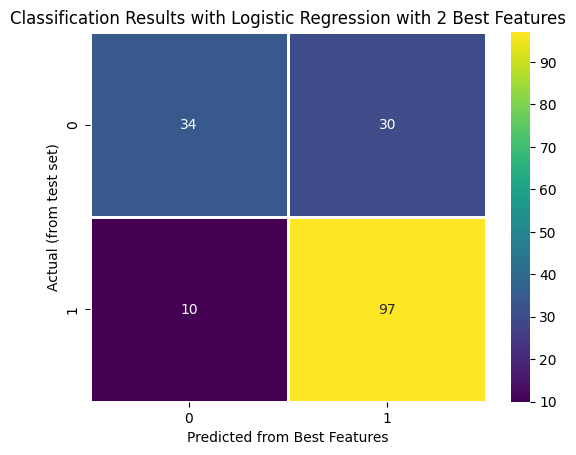

In [37]:
# calculate and print metrics to grade it
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

ax = sns.heatmap(conf_matrix, linewidths=2, annot=True, cmap='viridis', cbar=True)
ax.set_xlabel('Predicted from Best Features')
ax.set_ylabel('Actual (from test set)')
plt.title('Classification Results with Logistic Regression with 2 Best Features')
plt.show()


4. Construct a neural network with a single hidden layer containing two neurons
using Tensorflow. Use ReLU as activation function. Optimize the network with stochastic
gradient descent method. Choose mean squared error to calculate the loss. Fit the housing
prices dataset found on LMS using the network. Use the trained neural network model
to predict the price of a house in a city with population of 165, 000. Calculate a useful
regression metric. Plot the training and validation losses. Use a 70%-30% split for the
training and validation dataset. The architecture of the neural network and the optimizer
are fixed for this problem. Therefore, you need to choose a suitable learning rate and
number of epochs to minimize the loss. Explain the trends you found in the plots for
training and validation losses.

In [68]:
from google.colab import drive
from google.colab import files

# Mount Google Drive
drive.mount('/content/drive')
# Go to the current folder
%cd /content/drive/MyDrive/Colab Notebooks/


%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

datafile = 'housing_prices.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size
X = np.insert(X,0,1,axis=1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks


[ 6.1101  5.5277  8.5186  7.0032  5.8598  8.3829  7.4764  8.5781  6.4862
  5.0546  5.7107 14.164   5.734   8.4084  5.6407  5.3794  6.3654  5.1301
  6.4296  7.0708  6.1891 20.27    5.4901  6.3261  5.5649 18.945  12.828
 10.957  13.176  22.203   5.2524  6.5894  9.2482  5.8918  8.2111  7.9334
  8.0959  5.6063 12.836   6.3534  5.4069  6.8825 11.708   5.7737  7.8247
  7.0931  5.0702  5.8014 11.7     5.5416  7.5402  5.3077  7.4239  7.6031
  6.3328  6.3589  6.2742  5.6397  9.3102  9.4536  8.8254  5.1793 21.279
 14.908  18.959   7.2182  8.2951 10.236   5.4994 20.341  10.136   7.3345
  6.0062  7.2259  5.0269  6.5479  7.5386  5.0365 10.274   5.1077  5.7292
  5.1884  6.3557  9.7687  6.5159  8.5172  9.1802  6.002   5.5204  5.0594
  5.7077  7.6366  5.8707  5.3054  8.2934 13.394   5.4369]
[17.592    9.1302  13.662   11.854    6.8233  11.886    4.3483  12.
  6.5987   3.8166   3.2522  15.505    3.1551   7.2258   0.71618  3.5129
  5.3048   0.56077  3.6518   5.3893   3.1386  21.767    4.263    5.1875
  

Text(0, 0.5, 'Price in $10,000s')

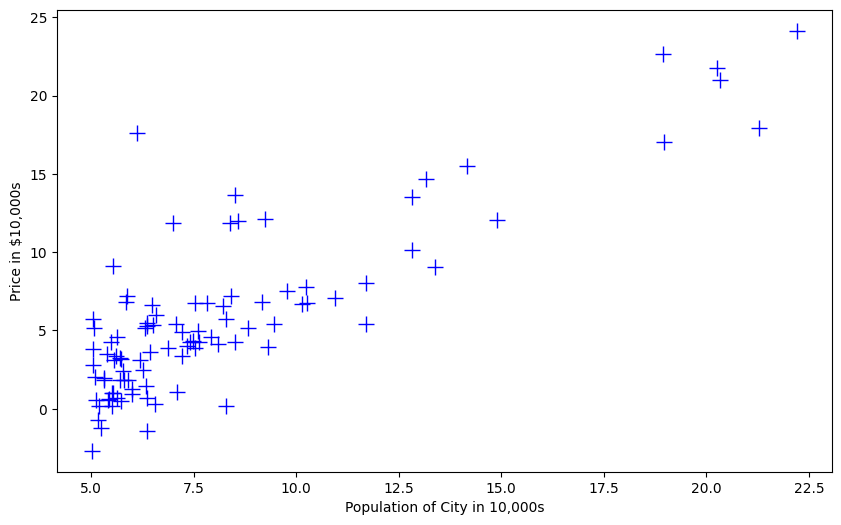

In [69]:
import tensorflow as tf


import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# X has a shape of (97, 2) where the first column is just 1
X = X[:, 1] # now shape of (97, 1)
# y has a shape of (97, 1)
y = y[:, 0] # now a shape of (97,)

print(X)
print(y)

plt.figure(figsize=(10,6))
plt.plot(X, y, 'b+', markersize=12)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Price in $10,000s')

In [96]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # 70/30 split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(2, activation='relu', input_shape=(1, )))
model.add(Dense(1)) # 1 output for linear activation for linear regression output

learning_rate = 0.01
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate), loss='mse')

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                     │ (None, 2)                   │               4 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [97]:
epochs = 200
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - loss: 72.5456 - val_loss: 55.7026
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 59.1565 - val_loss: 51.1508
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 60.3133 - val_loss: 48.9786
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 56.1335 - val_loss: 46.6352
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 52.5236 - val_loss: 44.7117
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 51.3199 - val_loss: 42.6433
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 41.7253 - val_loss: 40.6160
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 45.1198 - val_loss: 38.4277
Epoch 9/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 44.3938 - val_loss: 37.1507
Epoch 10/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 42.8049 - val_loss: 36.3598
Epoch 11/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 38.1274 - val_loss: 35.3492
Epoch 12/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step 

In [98]:
# population = (165,000/10,000 - np.mean(data[:, 0])) / np.std(data[:, 0])  # Normalize input for better performance
population = np.array([165,000/10,000])
predicted_price = model.predict(population)
print("Predicted Price:", predicted_price[0])
print(predicted_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Predicted Price: [6.0205617]
[[6.0205617]
 [6.0205617]
 [6.0205617]]


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Train RMSE: 5.581627305589222
Test RMSE: 5.262078553562518


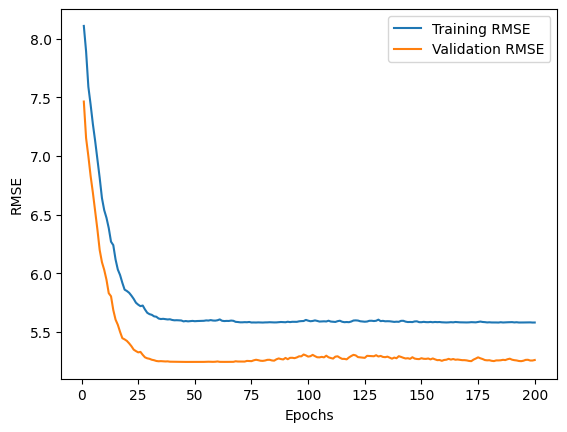

In [99]:
train_rsme = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
test_rsme = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
print("Train RMSE:", train_rsme)
print("Test RMSE:", test_rsme)
epochs_plotting = range(1, epochs + 1)
train_rmse_history = np.sqrt(history.history['loss'])
val_rmse_history = np.sqrt(history.history['val_loss'])
plt.plot(epochs_plotting, train_rmse_history, label='Training RMSE')
plt.plot(epochs_plotting, val_rmse_history, label='Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

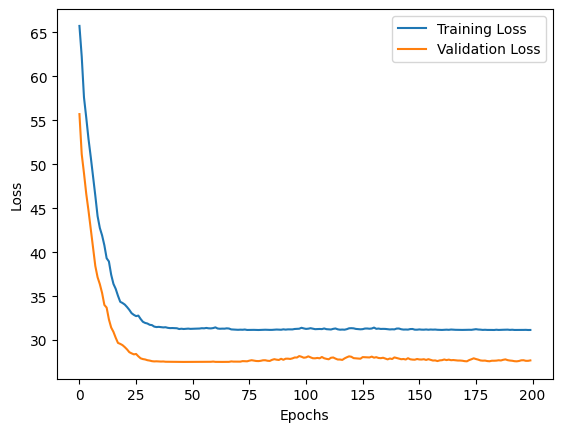

In [100]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


The Training and Validation RMSE converges to a minimum value at about 50 epochs for the learning rate selected. The Training and Validation Loss converges to a minimum value at about 50 epochs as well.

In [101]:
epochs = 50
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose = 0)
population = np.array([165,000/10,000])
predicted_price = model.predict(population)
print("Predicted Price for 50 epochs:", predicted_price[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Price for 50 epochs: [5.9123735]
